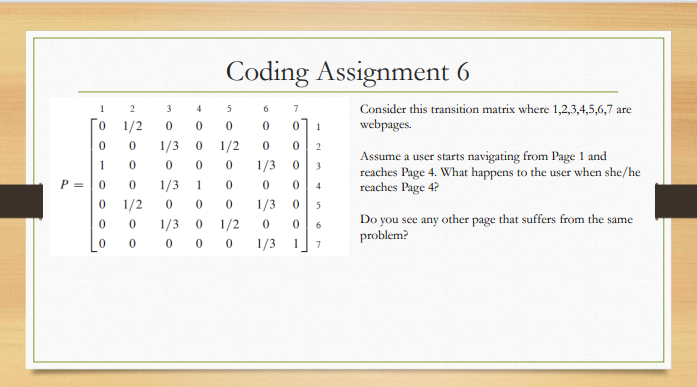

**Assume a user starts navigating from Page 1 and reaches Page 4. What happens to the user when she/he reaches Page 4**

Let P be the transition matrix which is probability of landing on a certain page . When a user starts navigating from Page 1 he reaches Page 4  by moving from page 1 -> 3 -> 4 . On reaching page 4 there is no probability for moving to any other pages. The probability of moving to other pages is 0 since it has no outbound links.This is termed to be **Dangling problem** and the nodes responsible for this problem is termed as **Dangling nodes**  

**Do you see any other page that suffers from the same problem**

   The page 7 also end up with the same problem

In [63]:
import numpy as np
A=np.array([[0,1/2,0,0,0,0,0],
 [0,0,1/3,0,1/2,0,0],
  [1,0,0,0,0,1/3,0],
   [0,0,1/3,1,0,0,0],
    [0,1/2,0,0,0,1/3,0],
   [0,0,1/3,0,1/2,0,0],
   [0,0,0,0,0,1/3,1]])

#### Dangling problem
In the context of PageRank, the "dangling problem" refers to a specific issue that arises during the calculation of the PageRank score for web pages within the Google algorithm. The dangling problem occurs when a web page has no outgoing links or only links to other pages that themselves are dangling (i.e., have no outgoing links).

**Dangling problem affects the PageRank algorithm:**

**Dangling Nodes:** When a web page is a dangling node, meaning it has no outgoing links, it doesn't contribute to the flow of PageRank to other pages. This creates a sink in the network of web pages, causing a loss of PageRank flow.

**Dampening Factor:** PageRank uses a dampening factor (usually denoted as 𝛼) to model the probability that a user will continue browsing by following links rather than navigating to a new page randomly. Without outgoing links, a dangling node effectively ends the browsing session. The dampening factor is multiplied by the probability of following a link, so if a page has no links, its contribution effectively becomes zero.
#### How to Overcome

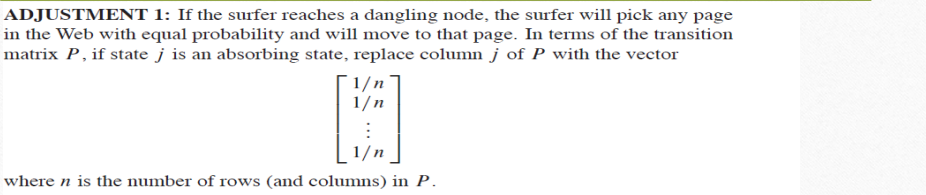

In [64]:
print("\nTransition matrix\n")
for row in A:
  print(row)


Transition matrix

[0.  0.5 0.  0.  0.  0.  0. ]
[0.         0.         0.33333333 0.         0.5        0.
 0.        ]
[1.         0.         0.         0.         0.         0.33333333
 0.        ]
[0.         0.         0.33333333 1.         0.         0.
 0.        ]
[0.         0.5        0.         0.         0.         0.33333333
 0.        ]
[0.         0.         0.33333333 0.         0.5        0.
 0.        ]
[0.         0.         0.         0.         0.         0.33333333
 1.        ]


#### Function to solve dangling problem

In [65]:
def danglingproblem(A):
  length=len(A)
  for i in range(length):
    if(A[i][i]==1): #dangling problem digonal equal to 1
      for j in range(length):
        A[j][i]=1/length

#### Printing the adjusted matrix with equal probability for dangling nodes

In [66]:
danglingproblem(A)
print("\nThe transition matrix after detecting and solving Dangling problem\n")
for row in A:
  print(row)


The transition matrix after detecting and solving Dangling problem

[0.         0.5        0.         0.14285714 0.         0.
 0.14285714]
[0.         0.         0.33333333 0.14285714 0.5        0.
 0.14285714]
[1.         0.         0.         0.14285714 0.         0.33333333
 0.14285714]
[0.         0.         0.33333333 0.14285714 0.         0.
 0.14285714]
[0.         0.5        0.         0.14285714 0.         0.33333333
 0.14285714]
[0.         0.         0.33333333 0.14285714 0.5        0.
 0.14285714]
[0.         0.         0.         0.14285714 0.         0.33333333
 0.14285714]


#### Another Issue : Cyles formed
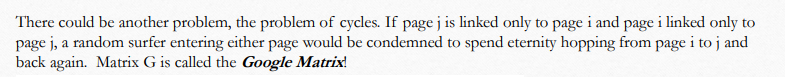
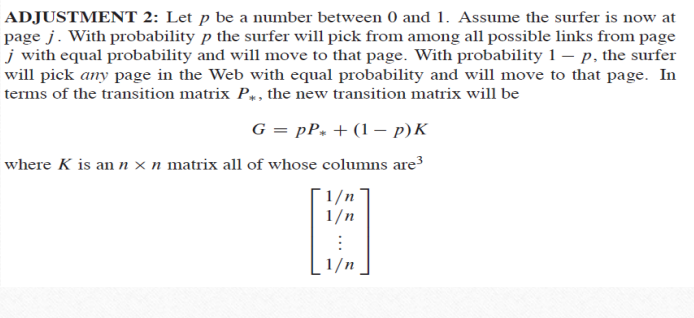

#### Function to calculate initial K matrix with equal probability

In [67]:
def k_matrix(A):
    """
    Construct a column-stochastic matrix K with equal probabilities.

    Args:
    - A: Input matrix

    Returns:
    - K: Column-stochastic matrix
    """
    leng = len(A)
    K = np.zeros((leng, leng))

    # Fill the K matrix with equal probabilities
    for i in range(leng):
        for j in range(leng):
            K[i][j] = 1 / leng

    return K

In [68]:
K= k_matrix(A)
print("The K matrix with equal probability is \n")
for row in K:
        print(row)

The K matrix with equal probability is 

[0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
 0.14285714]
[0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
 0.14285714]
[0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
 0.14285714]
[0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
 0.14285714]
[0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
 0.14285714]
[0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
 0.14285714]
[0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
 0.14285714]


#### Function to Calculate Google Matrix

**Arguments:**
- `p`: Probability that the surfer chooses any page at random.
- `A`: Transition matrix with resolved dangling nodes.
- `K`: Matrix with equal probability to avoid cycles.

**Returns:**
- `G`: Google matrix based on the formula
  > G = pA + (1-p)K


In [69]:
def google_matrix(p,A,K):
  G=p*A+(1-p)*K 
  return G

In [70]:
# Assign the probability as 0.8
p=0.8
Google_matrix=google_matrix(p,A,K)
print(Google_matrix)

[[0.02857143 0.42857143 0.02857143 0.14285714 0.02857143 0.02857143
  0.14285714]
 [0.02857143 0.02857143 0.2952381  0.14285714 0.42857143 0.02857143
  0.14285714]
 [0.82857143 0.02857143 0.02857143 0.14285714 0.02857143 0.2952381
  0.14285714]
 [0.02857143 0.02857143 0.2952381  0.14285714 0.02857143 0.02857143
  0.14285714]
 [0.02857143 0.42857143 0.02857143 0.14285714 0.02857143 0.2952381
  0.14285714]
 [0.02857143 0.02857143 0.2952381  0.14285714 0.42857143 0.02857143
  0.14285714]
 [0.02857143 0.02857143 0.02857143 0.14285714 0.02857143 0.2952381
  0.14285714]]


#### Steady State Vector

When calculating the steady state vector using the Google matrix, we iteratively multiply the initial vector `x` by the Google matrix `G` over a certain number of iterations. In some cases, the vector `x` will converge to a stable value after a certain number of iterations, meaning that further iterations do not change its values significantly. At this point, the vector `x` remains constant, indicating the steady state of the syste



This convergence occurs when the difference between successive iterations becomes small, often below a predefined threshold. The steady state vector represents the relative importance or rank of each page in the network, as determined by the PageRank algorihm.


In [95]:
def steady_state(Google_matrix,x,n):
 for i in range(n):
    x = np.dot(Google_matrix,x)
 return x

In [96]:
# Create a vector to show the page initially starts from page 1
x = np.array([1, 0, 0, 0, 0, 0, 0])
n=50
steady_state = steady_state(Google_matrix, x,n)
print("\nSteady State vector:")
print(steady_state)


Steady State vector:
[0.11774064 0.16656953 0.18972388 0.10170586 0.16215918 0.16656953
 0.09553137]


This steady state vector gives the page rank for each page on the web. It can be expressed as
Page rank for
         
> Page 1 = 0.1177

> Page 2 = 0.1665

> Page 3 = 0.1897

> Page 4 = 0.1017

> Page 5 = 0.1621

> Page 6 = 0.1665

> Page 7 = 0.0955

In [73]:
print("Page rank for each page:")
for i in range(len(steady_state)):
    rounded_rank = round(steady_state[i], 3)
    print(f"page{i+1}: {rounded_rank}")


Page rank for each page:
page1: 0.118
page2: 0.167
page3: 0.19
page4: 0.102
page5: 0.162
page6: 0.167
page7: 0.096
